In [5]:
cat('Last updated ', date())

Last updated  Wed Oct 19 21:24:01 2022

# Clinical Trial Data analysis using R and SAS
### Author : Ding-Geng (Din) Chen , Karl E. Peace, Pinggao Zhang

* Note : This note book is created with R in Jupyter Notebook.
* Note : I made this note book while studying the book. Additional R code in addition to the code in the book is added if necessary such that a code is not provided or addntional explanation is needed.  For detail explanation, refer the book

In [6]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          4                           
minor          1.3                         
year           2022                        
month          03                          
day            10                          
svn rev        81868                       
language       R                           
version.string R version 4.1.3 (2022-03-10)
nickname       One Push-Up                 

In [7]:
setwd('C:/Users/shims/Desktop/Bio-Statistics/Clinical Trial Data Analysis using R')

### 9.4 Bayesian Data Analysis
#### 9.4.1 Blood Pressure Data: Bayesian Linear Regression

In [8]:
dat <- read.csv('DBP.csv', header=T)

In [9]:
# We are interested in the blood pressure change
dat$diff <-dat$DBP5 - dat$DBP1

<span style="color:green;font-weight:700;font-size:15px">
    Quick note
</span>

We use _MCMCpack_ to analze the data from a Bayesian perspective using MCMC algorithm. Since the data is continuous, we use the function _MCMCregress_ in the _MCMCpack_. The help functions explain MCMC regress details I extract the explanation.

In [10]:
# ?MCMCregress

__MCMCregress__ simulates from the posterior distribution using standard Gibbs sampling (a multivariate Normal draw for the betas, and an inverse Gamma draw for the conditional error variance). 

The model takes the following form:
$$ y_i= x^\prime _i\beta + \epsilon_i $$

where the errors are assumed to be Gaussian : 
$$ \epsilon_i \sim N (0, \sigma^2) $$

We assume standard, semi-conjugate prior:
$$\beta \sim N(b_0, B^{-1}_0)$$

And: 
$$\sigma^{-2} \sim Gamma(c_0/2, d_0/2)$$

Where $\beta$ and $\sigma ^{-2}$ are assumed a priori independent. Note that only starting values for $\beta$ are allowed because simulation is done using Gibbs sampling with the conditional error variance as the first block in the sampler.

The Bayesinn model with noninformative prior in the typical simple linear regression model is a special case whtn $B_0=0$.

In [11]:
library(MCMCpack)

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2022 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



To fit a linear regression model with noninformative prior for the regression parameters and an inverse gamma prior with shape and scale parameter both equal to 0.0005 for the error variance, we call the MCMCregress. 

In [12]:
# fit the Bayes regression model with 1000 burn-in
BayesMod <- MCMCregress(diff ~ TRT + Age, dat)
summary(BayesMod)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

               Mean      SD  Naive SE Time-series SE
(Intercept) -6.8126 3.04021 0.0304021      0.0307719
TRTB        10.1195 0.81085 0.0081085      0.0081085
Age         -0.1726 0.06139 0.0006139      0.0006189
sigma2       6.4835 1.60148 0.0160148      0.0173175

2. Quantiles for each variable:

                2.5%     25%    50%    75%    97.5%
(Intercept) -12.7037 -8.8381 -6.823 -4.792 -0.79152
TRTB          8.5432  9.5751 10.119 10.648 11.73873
Age          -0.2954 -0.2131 -0.172 -0.132 -0.05422
sigma2        4.0855  5.3289  6.225  7.329 10.23392


We can observe various quantities of interest such as the posterioir mean, standard deviation, and quantiles.

__FIGURE 9.3__: MCMC Plots

This plots shows to generate etrace plots for convergence diagnostics and martinal posterior kernel densiy plots for the MCMC results.

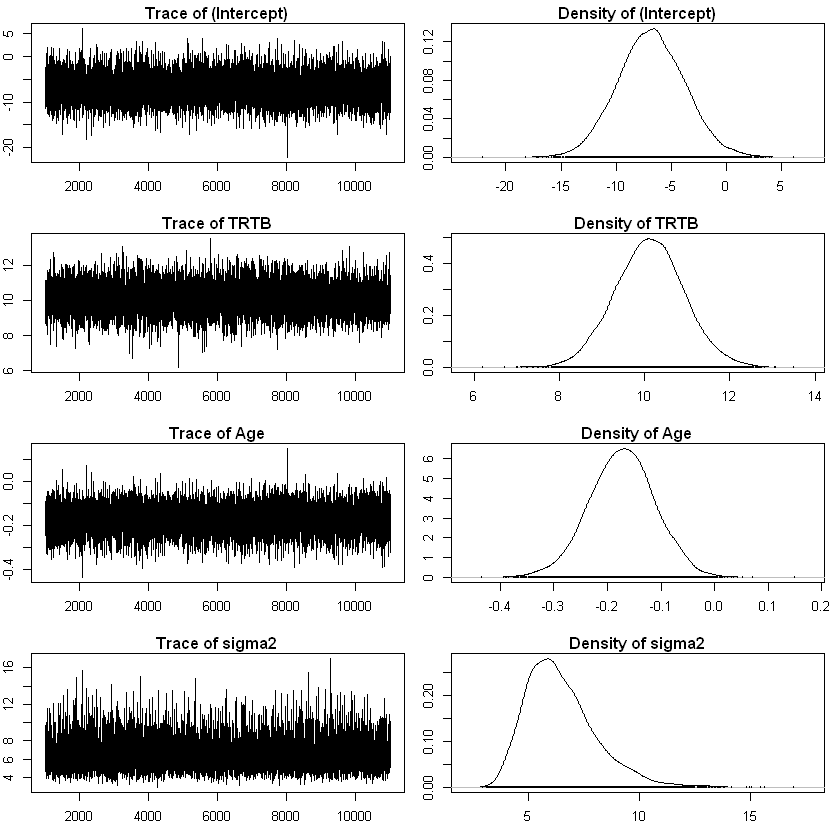

In [13]:
#make the maragin
par(mar = c (3,2,1.5,1))

#mate the MCMC plot
plot(BayesMod)

#### 9.4.2 Binomial Data: Bayesian Logistic Regression

In [14]:
betablocker <- read.csv('betablocker.csv', header=T)

In [15]:
names(betablocker)

[1] "Center"    "Deaths"    "Total"     "Treatment"

In [16]:
# extract center 1
beta1 = betablocker[betablocker$Center == 1, c("Deaths","Total","Treatment")]

# print the center 1 data
beta1

,Deaths,Total,Treatment
,<int>,<int>,<chr>
1,3,39,Control
12,3,38,Treated


There are 3 deaths from 39 patients in the control group and 3 death from 38 patients in the treatment group. We convert these binomial count data into a data frame with biniary outcome.

In the beta1 data frame, death(1) denotes deatn, death(0) denotes alive.

In [17]:
# make a dataframe
beta1 = data.frame(trt = c(rep("TRT", 38),rep("Cont",39)),
death = c(rep(1,3), rep(0,38-3), rep(1,3), rep(0,39-3)))
# print the first 6 observations
 head(beta1)

,trt,death
,<chr>,<dbl>
1,TRT,1
2,TRT,1
3,TRT,1
4,TRT,0
5,TRT,0
6,TRT,0


__GLM Note__

https://github.com/sshim4/Generalized-Linear-Models-and-Nonparametric-Regression/blob/main/W1.Binomial%20Regression.ipynb

In [18]:
# fit logistic regression
glm.beta = glm(death ~trt, family=binomial,data= beta1)
# print the result
summary(glm.beta)


Call:
glm(formula = death ~ trt, family = binomial, data = beta1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4056  -0.4056  -0.4001  -0.4001   2.2649  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.48491    0.60092  -4.135 3.55e-05 ***
trtTRT       0.02817    0.85030   0.033    0.974    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.144  on 76  degrees of freedom
Residual deviance: 42.143  on 75  degrees of freedom
AIC: 46.143

Number of Fisher Scoring iterations: 5


From the logistic regression, the treatment effect is not statistically significanat with p-value=0.974. But the result is expected with 3 of 39 patneits in the control group and 3 of 38 patients in treatment group died.

For Bayesian modeling using MCMC for binary data, we use MCMClogit function in MCMCpack. In this function, the model is as follow: 
    $y_i \sim Bernouilli(p_i)$ with the logit link function as $p_i = \frac{exp(x^\prime_i\beta)}{1+exp(x^\prime_i\beta)}$. The multivariate normal prior is assumed for $\beta$ as $\beta \sim N(b_0, B^{-1}_0)$, where $B_0$ is the prior precision of $\beta$ under a multivariate normal prior. The noninformative prior obtains if $B_0=0$. We now fit the Bayesian model using the noninformative prior distribution with the defaut setting using $B_0=0$.

In [19]:
## Call MCMClogit with default
Bayes1.beta = MCMClogit(death~trt, data=beta1)
# print the summary for MCMC
summary(Bayes1.beta)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean     SD Naive SE Time-series SE
(Intercept) -2.65158 0.6516 0.006516        0.02067
trtTRT       0.04217 0.9095 0.009095        0.02826

2. Quantiles for each variable:

              2.5%     25%      50%     75%  97.5%
(Intercept) -4.103 -3.0425 -2.59693 -2.1935 -1.545
trtTRT      -1.746 -0.5575  0.02502  0.6467  1.784


The 95% credible interval for treatment effect is (-1.746, 1.784) which contains 0 so is not statistically significant.

__FIGURE 9.4__: MCMC Plots for Betablocker

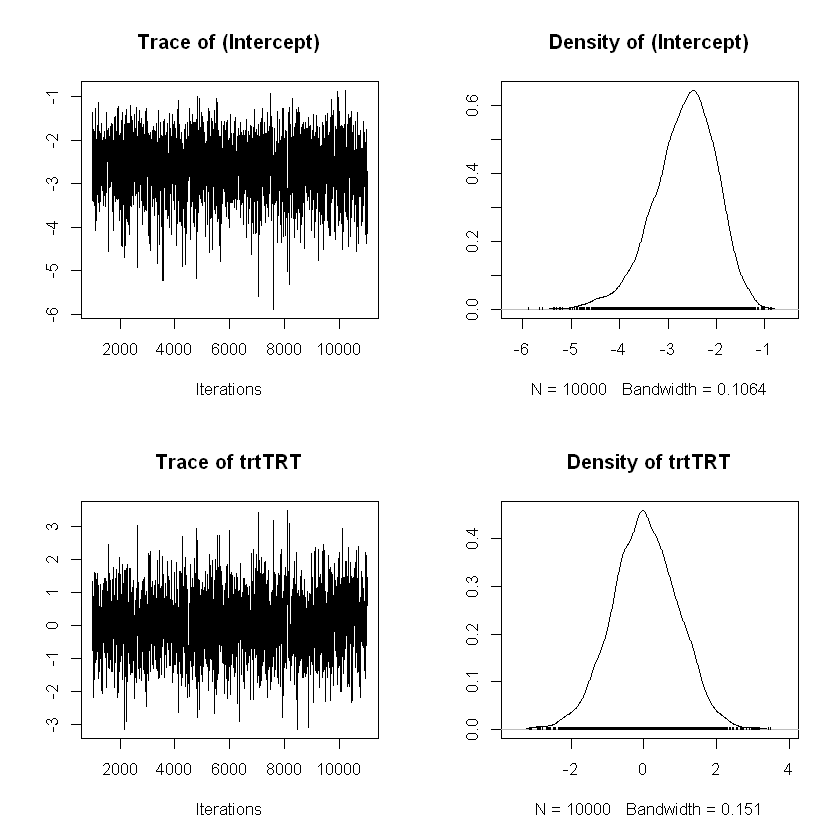

In [11]:
plot(Bayes1.beta)

To further illustrate Bayesian robustness, we consider a vague multivariate normal prior using $B_0=0.0001$.

In [21]:
# Bayesian logistic regression with multivariate normal prior
Bayes2.beta = MCMClogit(death~trt, B0=.001,data=beta1)
# print the fit
summary(Bayes2.beta)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean     SD Naive SE Time-series SE
(Intercept) -2.65404 0.6532 0.006532        0.02076
trtTRT       0.04366 0.9056 0.009056        0.02824

2. Quantiles for each variable:

              2.5%     25%      50%     75%  97.5%
(Intercept) -4.114 -3.0437 -2.59442 -2.1970 -1.544
trtTRT      -1.707 -0.5697  0.04557  0.6311  1.790


Same result as Bayes1.beta

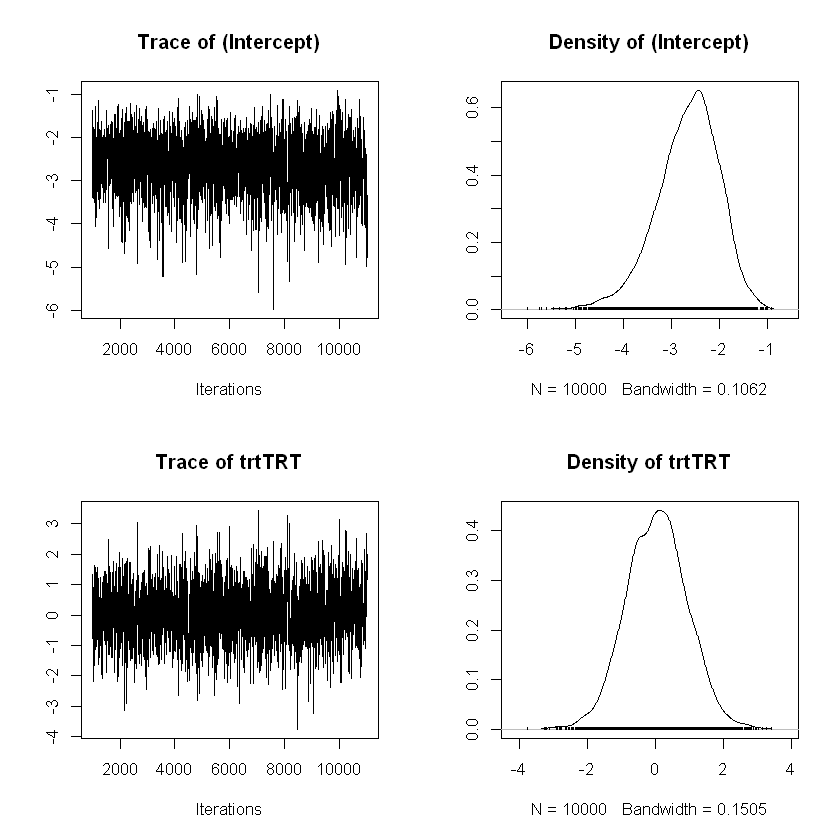

In [22]:
plot(Bayes2.beta)

#### 9.4.3 Count Data: Bayesian Poission Regression